In [1]:
# https://www.youtube.com/watch?v=fiz1ORTBGpY&list=PLfFghEzKVmjuQztEASqU0hI_aHAJf62u7

Import Dependencies

In [2]:
import numpy as np  # Import NumPy for numerical operations and array manipulation
import pandas as pd  # Import Pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Import function to split data into training and test sets
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.svm import SVC  # Import Support Vector Classifier model
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors model
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier model
from sklearn.metrics import accuracy_score  # Import function to calculate accuracy
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

Data colection and data processing

In [3]:
# Load the dataset into a Pandas DataFrame
sonar_data = pd.read_csv('/content/sonar_data.csv', header=None)

In [4]:
# Display the first few rows of the dataset to understand its structure
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# Display the number of rows and columns in the dataset
sonar_data.shape

(208, 61)

**Data Distribution**

Visualizing the distribution of variables helps identify issues such as the need for normalization or possible outliers.



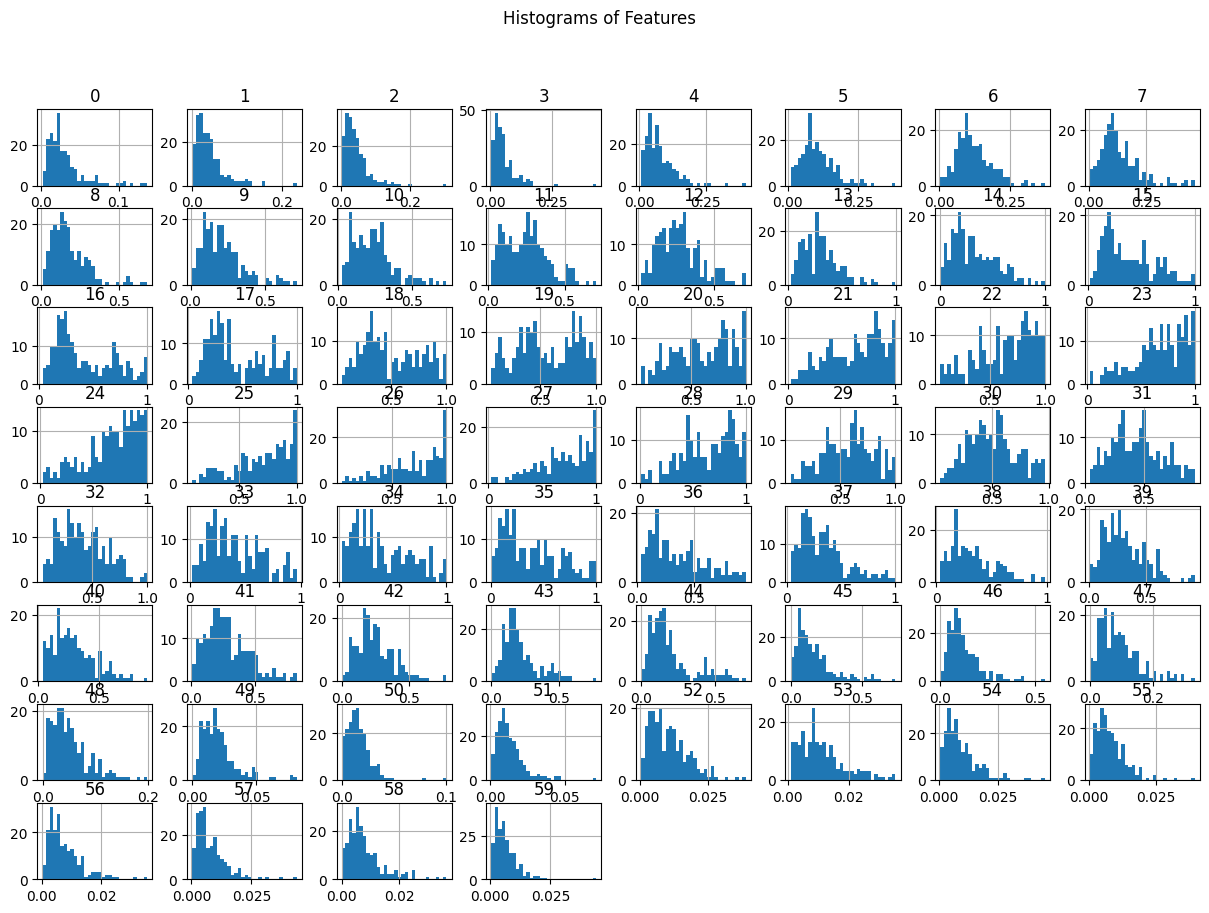

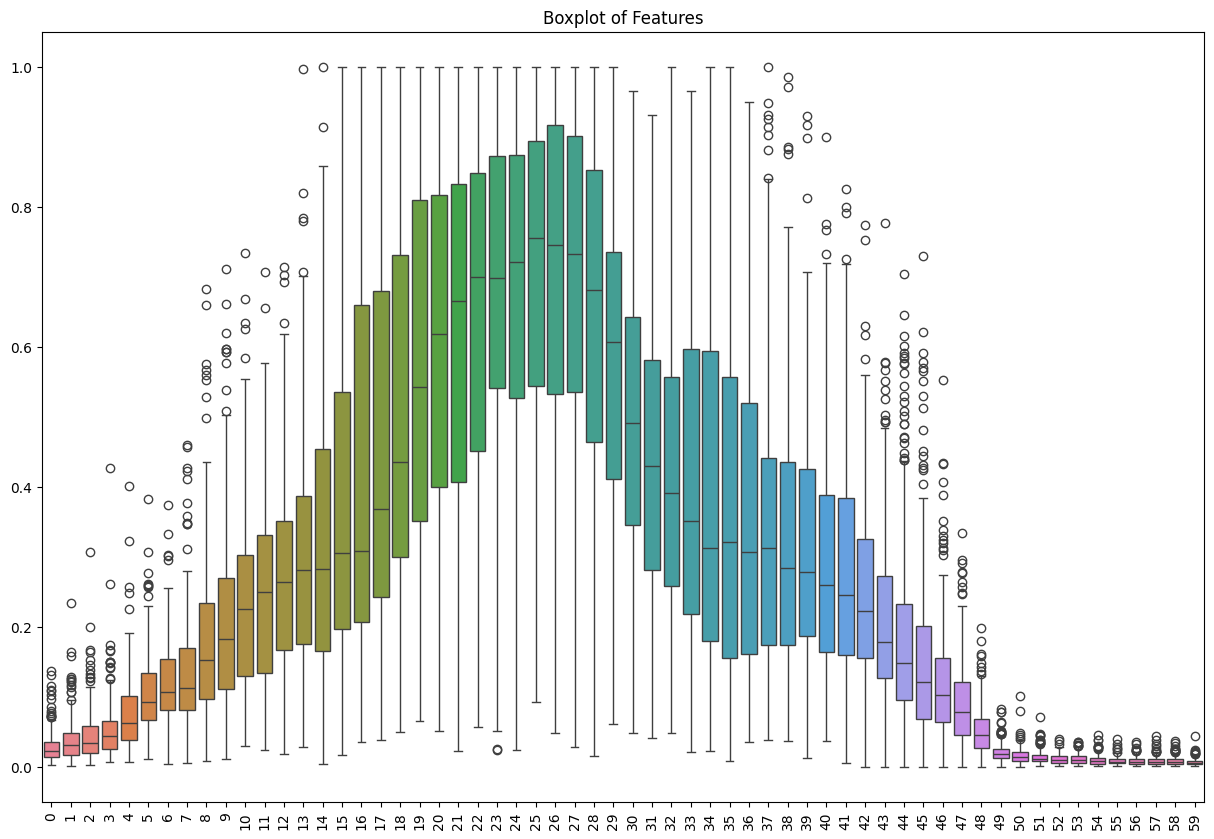

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each feature - Histograms show the distribution of each feature and help identify patterns or anomalies.
sonar_data.iloc[:, :-1].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Boxplot to check for outliers - Boxplots help identify outliers in features, which can be important for model accuracy.
plt.figure(figsize=(15, 10))
sns.boxplot(data=sonar_data.iloc[:, :-1])
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()


**Feature Correlation**

Understanding how features are correlated can help identify redundant or collinear features.


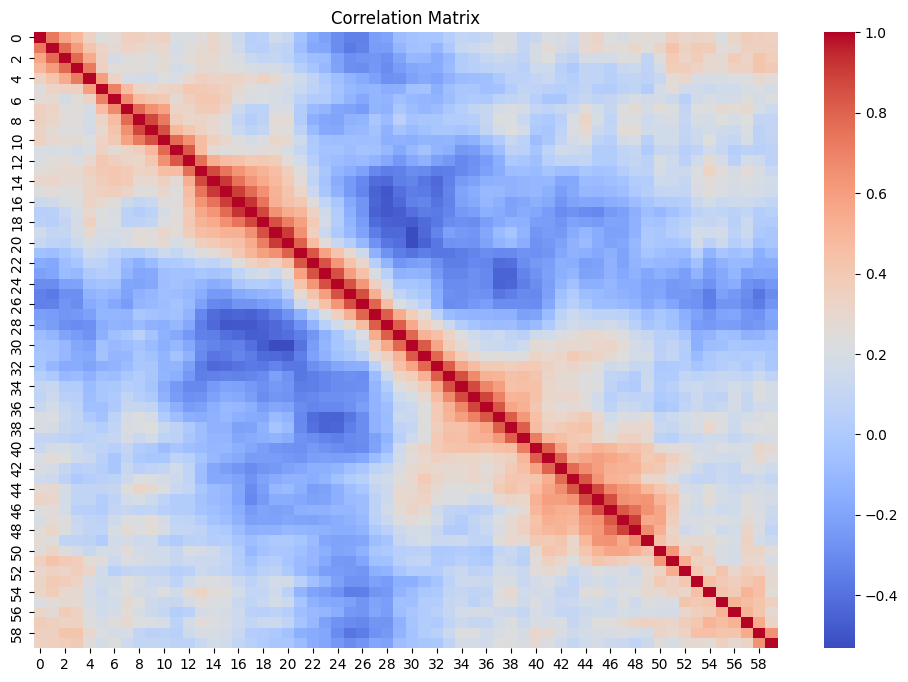

In [7]:
# Separate features and label; correlation matrix is calculated because Pandas corr() function can only be applied to numeric columns
X = sonar_data.iloc[:, :-1]  # Features (excluding the last column)
Y = sonar_data.iloc[:, -1]   # Label (last column)

# Calculate correlation only on numeric features
correlation_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Class Distribution Analysis**

In [8]:
print("Class distribution:\n", sonar_data[60].value_counts(normalize=True))

Class distribution:
 60
M    0.533654
R    0.466346
Name: proportion, dtype: float64


**Class Visualization**

Reducing dimensionality and visualizing classes can help understand how classes are separated in feature space.


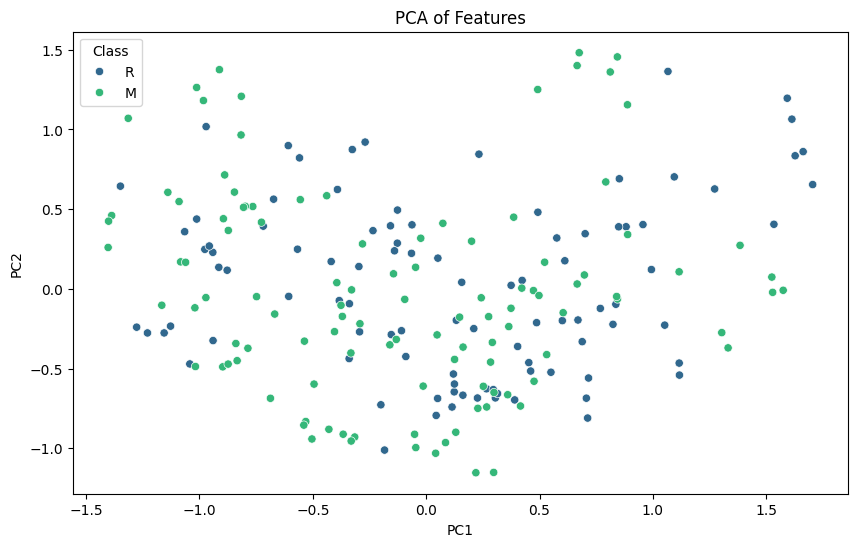

In [9]:
# Principal Component Analysis
from sklearn.decomposition import PCA

X = sonar_data.iloc[:, :-1]
Y = sonar_data[60]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = Y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='viridis')
plt.title('PCA of Features')
plt.show()

**Outlier Analysis**

Identifying outliers can be useful, especially if they are affecting model quality.

In [10]:
from scipy import stats

z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers per feature:\n", outliers)


Number of outliers per feature:
 0     6
1     3
2     4
3     2
4     4
5     2
6     2
7     5
8     6
9     3
10    3
11    1
12    2
13    2
14    1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    2
39    3
40    1
41    3
42    2
43    1
44    1
45    6
46    5
47    3
48    3
49    5
50    2
51    5
52    2
53    3
54    3
55    3
56    3
57    4
58    3
59    3
dtype: int64


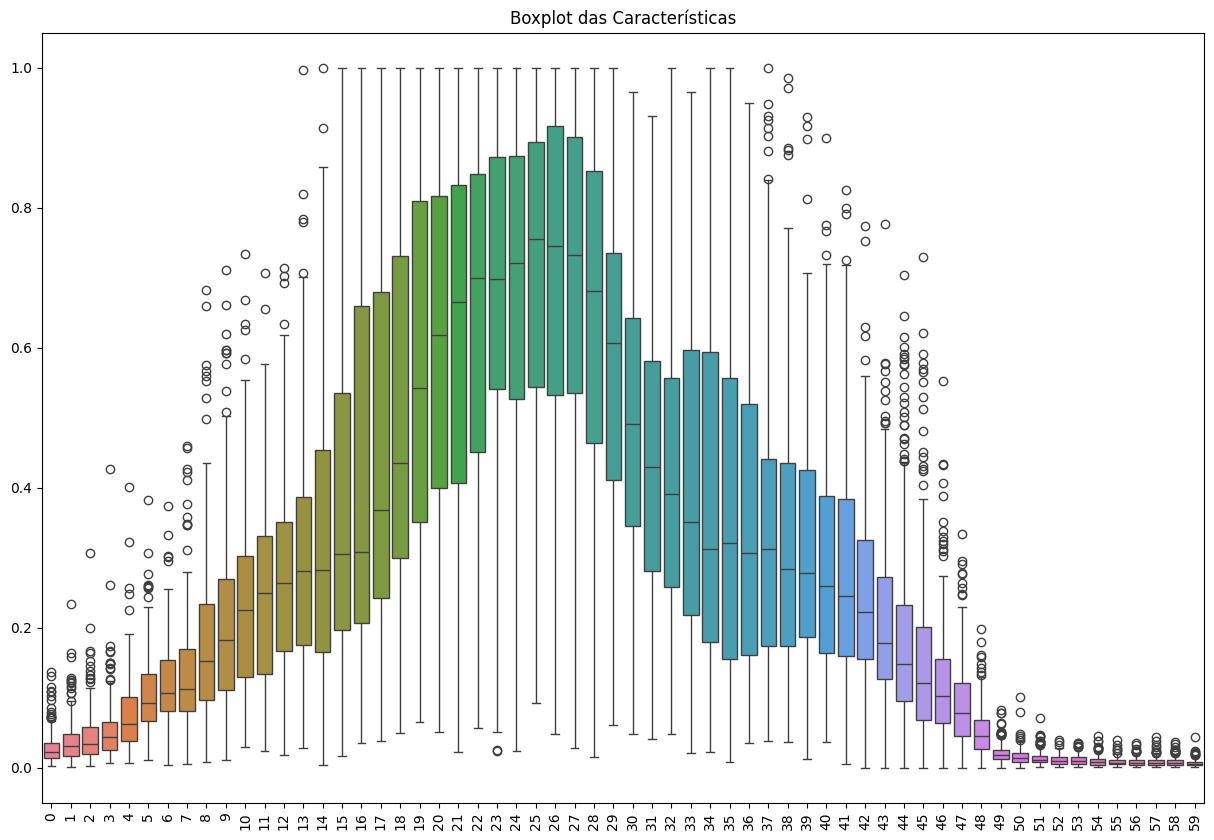

In [11]:
# Visualize outliers: Boxplots or scatter plots can help visualize outliers in each feature.
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Boxplot das Características')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Get statistical measures of the data to understand its distribution
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
print("Missing values in each column:\n", sonar_data.isnull().sum())

Missing values in each column:
 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


In [14]:
# Display the count of each class in the target column (60)
print(sonar_data[60].value_counts())

60
M    111
R     97
Name: count, dtype: int64


In [15]:
# Group by the target column (60) and get the mean of each group to analyze data distribution
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


**Separating Data and Labels**


In [16]:
# Separate features (X) from the target labels (Y)
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [17]:
# Display the features and labels to verify separation
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

**Training and Test data**

In [41]:
# Split the dataset into training and test sets
# 25% of the data is used for testing, and the rest for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=1)

In [42]:
# Display the shapes of the datasets to confirm the split
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (156, 60) (52, 60)


In [38]:
print(Y.shape, Y_train.shape, Y_test.shape)

(208,) (145,) (63,)


In [21]:
# Display the training features and labels for inspection
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
157  0.0201  0.0178  0.0274  0.0232  0.0724  0.0833  0.1232  0.1298  0.2085   
160  0.0258  0.0433  0.0547  0.0681  0.0784  0.1250  0.1296  0.1729  0.2794   
155  0.0211  0.0128  0.0015  0.0450  0.0711  0.1563  0.1518  0.1206  0.1666   
132  0.0968  0.0821  0.0629  0.0608  0.0617  0.1207  0.0944  0.4223  0.5744   
87   0.0856  0.0454  0.0382  0.0203  0.0385  0.0534  0.2140  0.3110  0.2837   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
63   0.0067  0.0096  0.0024  0.0058  0.0197  0.0618  0.0432  0.0951  0.0836   

         9   ...      50      51      52      53   

**Multiple Model Evaluations**

In [43]:
models = [
    LogisticRegression(),
    SVC(kernel='linear'),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=0),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
]

In [44]:
best_model = None
best_accuracy_test = 0  # Variable is correctly initialized
best_model_name = ""

def compare_models():
    global best_model, best_accuracy_test, best_model_name
    for model in models:
        model.fit(X_train, Y_train)  # Train the current model

        # Predictions and accuracy on training set
        train_data_prediction = model.predict(X_train)
        accuracy_train = accuracy_score(Y_train, train_data_prediction)

        # Predictions and accuracy on test set
        test_data_prediction = model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, test_data_prediction)

        # Update the best model based on test accuracy
        if accuracy_test > best_accuracy_test:
            best_accuracy_test = accuracy_test  # Use a variável correta aqui
            best_model = model
            best_model_name = model.__class__.__name__  # Store the name of the model with the best accuracy

        # Show both accuracies
        print(f'Accuracy score for {model.__class__.__name__} - Training: {accuracy_train}, Test: {accuracy_test}')

    # Print the best model and its accuracy
    print(f"\nThe best model is: {best_model_name} with a test accuracy of {best_accuracy_test}")

# Calling the function to compare models
compare_models()

Accuracy score for LogisticRegression - Training: 0.8397435897435898, Test: 0.6538461538461539
Accuracy score for SVC - Training: 0.8717948717948718, Test: 0.6923076923076923
Accuracy score for KNeighborsClassifier - Training: 0.8397435897435898, Test: 0.8461538461538461
Accuracy score for RandomForestClassifier - Training: 1.0, Test: 0.7884615384615384
Accuracy score for GaussianNB - Training: 0.7435897435897436, Test: 0.7115384615384616
Accuracy score for MultinomialNB - Training: 0.7756410256410257, Test: 0.6730769230769231
Accuracy score for BernoulliNB - Training: 0.5384615384615384, Test: 0.5384615384615384
Accuracy score for DecisionTreeClassifier - Training: 1.0, Test: 0.7884615384615384
Accuracy score for GradientBoostingClassifier - Training: 1.0, Test: 0.7884615384615384
Accuracy score for AdaBoostClassifier - Training: 1.0, Test: 0.7884615384615384
Accuracy score for ExtraTreesClassifier - Training: 1.0, Test: 0.8846153846153846

The best model is: ExtraTreesClassifier with

Making a Predictive System

In [45]:
# Define input data for prediction - Open the dataset and copy a line without the label
input_data = (0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228,0.1508,0.1809,0.2390,0.2947,0.2866,0.4010,0.5325,0.5486,0.5823,0.6041,0.6749,0.7084,0.7890,0.9284,0.9781,0.9738,1.0000,0.9702,0.9956,0.8235,0.6020,0.5342,0.4867,0.3526,0.1566,0.0946,0.1613,0.2824,0.3390,0.3019,0.2945,0.2978,0.2676,0.2055,0.2069,0.1625,0.1216,0.1013,0.0744,0.0386,0.0050,0.0146,0.0040,0.0122,0.0107,0.0112,0.0102,0.0052,0.0024,0.0079,0.0031)

# Convert input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array to the format expected by the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction with the best model
if best_model is not None:
    prediction = best_model.predict(input_data_reshaped)
    print(f"Prediction made using the best model ({best_model_name})")
    print(prediction)

    # Interpreting the prediction
    if (prediction[0] == 'R'):
        print('The object is a Rock')
    else:
        print('The object is a Mine')
else:
    print('No model available for prediction.')

Prediction made using the best model (ExtraTreesClassifier)
['M']
The object is a Mine


In [ ]:
# Done